## The FitzHugh-Nagumo 

Parameters and model of type II neuron with one fixed point and a Hopf bifurcation.



In [5]:
using CompNeuro
using GLMakie

┌ Info: Using Makie backend for plotting
└ @ CompNeuro /Users/cocconat/Documents/Research/teaching/CompNeuro/src/makie.jl:5


In [13]:
function fitzhugh_nagumo!(du, u, p, t)
    u_val, w_val = u
    @unpack I, b0, b1, t_impulse, ϵ, A = p

    du[1] = u_val - (1/3) * u_val^3 - w_val + I  # du/dt
    du[2] = ϵ * (b0 + b1 * u_val - w_val)             # dw/dt

end

p = @update NamedTuple() begin
    I = 0.0  # External current
    b0 = 0.9 # Parameter b
    b1 = 1
    b = 0.0 # Parameter b
    t_impulse = 20.0  # Time of impulse
    ϵ = 0.1  # Width of impulse
    A = .7  # Amplitude of impulse
    θ = 1.0
end

# Initial conditions: [u0, w0]
u0 = [-2.0, -0.5]


2-element Vector{Float64}:
 -2.0
 -0.5

In [16]:
##
u_range=-4:4
w_range=-4:4

fig = Figure(size=(1200, 900))
sl_x = Slider(fig[2,1][2, 1], range = u_range, startvalue = -2)
sl_y = Slider(fig[2,1][1, 2], range = w_range, horizontal = false, startvalue = 0)

ax1 = Axis(fig[1, 1], xlabel="Time", ylabel="Value", title="AdEx Neuron Model")
ax2 = Axis(fig[2, 1][1,1], xlabel="u", ylabel="w", title="Phase plane",)
panel = fig[2,1][1, 3]

sg = SliderGrid(
    panel[1,1],
    (label = "I_ext", range = 0:0.1:1.2, format = "{:.1f}", startvalue = 0),
    (label = "b0", range = 0:0.05:2, format = "{:.1f} nA", startvalue = 0.9),
    (label = "b1", range = 0:0.05:2, format = "{:.1f} nS", startvalue = 1),
    (label = "A", range = 0:0.05:2, format = "{:.1f} nS", startvalue = 0),
    width = 350,
    tellheight = false)
    # I = 0.0:0.1:1.2, u0 = -2.5:0.1:1.5, w0 = -2.5:0.1:1.5,
    # b0=0.1:0.1:2, b1=0.1:0.1:2, A= 0:0.05:2.0


button_state = Observable(false)
button_color = :lightblue
button = panel[2, 1] = Button(fig, label = "Current Impulse", buttoncolor = lift(x->x ? :red : :lightblue, button_state))
on(button.clicks) do n
    global button_state[] = !(button_state[])
    @show "Button state is:" button_state
end

sl_ext, sl_b0, sl_b1, sl_A = sg.sliders
@lift begin 
    p0 = @update p begin
        I = $(sl_ext.value)
        b0 = $(sl_b0.value)
        b1 = $(sl_b1.value)
        A = $(sl_A.value)
        I_ext = $(sl_ext.value)
        spike_times = Float64[]
        t_impulse = $(button_state) ? 20.0 : -1.0
    end
    u0  = [$(sl_x.value), $(sl_y.value)]
    solution = run_model(p0, u0, fitzhugh_nagumo!, (0, 300.0), u_range=u_range, w_range=w_range)
    fig = CompNeuro.plot_solution(solution, ax1, ax2)
end
fig
##

In [17]:
function morris_lecar!(du, u, p, t)
    V, w = u
    @unpack I, g_Ca, g_K, g_L, V_Ca, V_K, V_L, V1, V2, V3, V4, ϕ  = p

    # Steady-state activation functions
    m_inf(V) = 0.5 * (1 + tanh((V - V1) / V2))
    w_inf(V) = 0.5 * (1 + tanh((V - V3) / V4))
    τ_w(V) = 1 / cosh((V - V3) / (2 * V4))

    # Current balance equation
    I_Ca = g_Ca * m_inf(V) * (V - V_Ca)
    I_K = g_K * w * (V - V_K)
    I_L = g_L * (V - V_L)

    du[1] = (I - I_Ca - I_K - I_L) / C  # dV/dt
    du[2] = ϕ * (w_inf(V) - w) / τ_w(V)     # dw/dt
end

# Parameters for three fixed points
C = 20.0
I = 0.0
g_Ca, g_K, g_L = 4.0, 8.0, 2.0
V_Ca, V_K, V_L = 120.0, -84.0, -60.0
V1, V2, V3, V4 = -1.2, 18.0, 10.0, 14.5
p = (; I, g_Ca, g_K, g_L, V_Ca, V_K, V_L, V1, V2, V3, V4, ϕ= 0.04,
     t_impulse=20.0, ϵ=0, A=0.0, b=0)



(I = 0.0, g_Ca = 4.0, g_K = 8.0, g_L = 2.0, V_Ca = 120.0, V_K = -84.0, V_L = -60.0, V1 = -1.2, V2 = 18.0, V3 = 10.0, V4 = 14.5, ϕ = 0.04, t_impulse = 20.0, ϵ = 0, A = 0.0, b = 0)

In [25]:
##
u_range=-80.0:5.0:50.0
w_range=-0.5:0.1:1.5

fig = Figure(size=(1200, 900))
sl_x = Slider(fig[2,1][2, 1], range = u_range, startvalue = -60)
sl_y = Slider(fig[2,1][1, 2], range = w_range, horizontal = false, startvalue = 0)

ax1 = Axis(fig[1, 1], xlabel="Time", ylabel="Value", title="AdEx Neuron Model")
ax2 = Axis(fig[2, 1][1,1], xlabel="u", ylabel="w", title="Phase plane",)
panel = fig[2,1][1, 3]

sg = SliderGrid(
    panel[1,1],
    (label = "I_ext", range = 0:0.5:100, format = "{:.1f}", startvalue = 0),
    (label = "V1", range = -10:0.05:20, format = "{:.1f} nA", startvalue = -1.2),
    (label = "V3", range = -10:0.05:20, format = "{:.1f} nS", startvalue = 10),
    (label = "A", range = 0:0.05:200, format = "{:.1f} nS", startvalue = 0),
    width = 350,
    tellheight = false)
    # I = 0.0:0.1:1.2, u0 = -2.5:0.1:1.5, w0 = -2.5:0.1:1.5,
    # b0=0.1:0.1:2, b1=0.1:0.1:2, A= 0:0.05:2.0


button_state = Observable(false)
button_color = :lightblue
button = panel[2, 1] = Button(fig, label = "Current Impulse", buttoncolor = lift(x->x ? :red : :lightblue, button_state))
on(button.clicks) do n
    global button_state[] = !(button_state[])
    @show "Button state is:" button_state
end

sl_ext, sl_b0, sl_b1, sl_A = sg.sliders
@lift begin 
    p0 = @update p begin
        I = $(sl_ext.value)
        V1 = $(sl_b0.value)
        V3 = $(sl_b1.value)
        A = $(sl_A.value)
        θ = -1
        I_ext = $(sl_ext.value)
        spike_times = Float64[]
        t_impulse = $(button_state) ? 20.0 : -1.0
    end
    u0  = [$(sl_x.value), $(sl_y.value)]
    solution = run_model(p0, u0, morris_lecar!, (0, 300.0), u_range=u_range, w_range=w_range)
    fig = CompNeuro.plot_solution(solution, ax1, ax2)
end
fig

In [15]:

# Initial conditions

anim = @manipulate  for I = 0.0:.010:70, u0 = , w0 = -0.5:0.1:1.1 # Time of impulse
    ϵ = 0 # Width of impulse
    u0 = [u0, w0]

    p = (;I, g_Ca, g_K, g_L, V_Ca, V_K, V_L, V1, V2, V3, V4, ϕ= 0.04, 
         t_impulse, ϵ, A=0, b=0)

    # p = (I, b0, b1, t_impulse, ε, A)
    run_model(p, u0, morris_lecar!, (0, 600.0), u_range=-80:50, w_range=-.5:0.5, do_quiver=true)
    plot!(plot_title="Morris - Lecar Model")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["I"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 7001, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(3501), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/cocconat/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/cocconat/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/cocconat/.julia/packages/InteractBase/8TTmI/src/../assets/all.js"), Asset("css", nothing, "/Users/cocconat/.julia/packages/InteractBase/8TTmI/src/../assets/style.css"), Asset("css", nothing, "/Users/cocconat/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x0000000351cbc4c0, Task (runnable, started) @0x0000000351cbc4c0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 13491835312, 4738163552)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0

In [5]:

## AdEx model
function adex!(du, u, p, t)
    @unpack C, V_L, I_ext, ΔT, θ, a, b,  R, τm, τw = p
    du[1] = 1/τm * (- (u[1] - V_L) + ΔT *exp((u[1] - θ)/ΔT)) + (-u[2] + I_ext)/C
    du[2] = 1/τw *(a*( u[1]- V_L) - u[2])
end

# Reset condition: when V crosses V_th, reset to V_reset
function reset_condition(u, t, integrator) 
    integrator.u[1] > 0
end
function reset_affect!(integrator)
    integrator.u[1] = integrator.p.V_reset
    integrator.u[2] += integrator.p.b
    push!(integrator.p.spike_times, integrator.t)
end
cb = DiscreteCallback(reset_condition, reset_affect!)


DiscreteCallback{typeof(reset_condition), typeof(reset_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Nothing, Tuple{}}(Main.reset_condition, Main.reset_affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1], nothing, ())

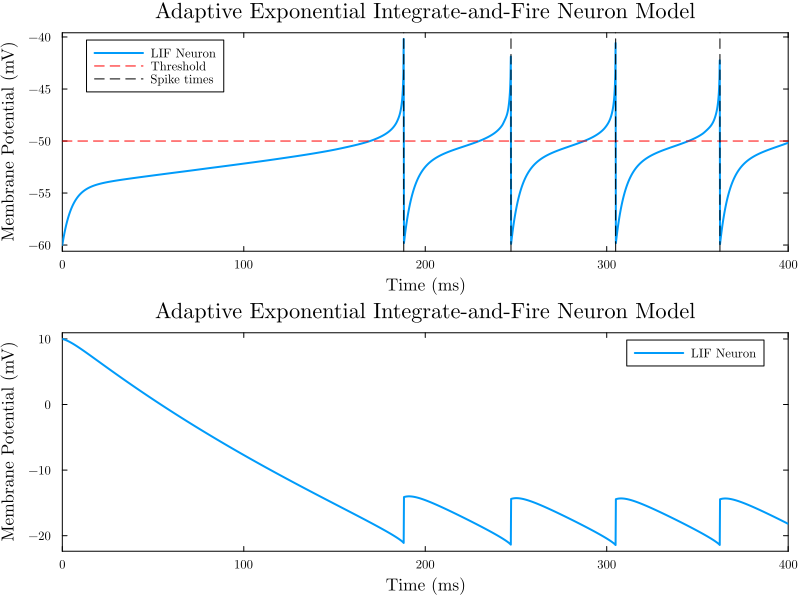

In [15]:
u0 = [-60.0, 10.]  # Initial membrane potential
tspan = (0.0, 400.0)

# Parameters
p = (C=50, 
    V_L=-60.0, 
    V_reset=-60.0, 
    θ=-50.0, 
    ΔT=2.0, 
    a=-4.0, 
    b=7.0, 
    R=0.5, 
    τm=5, 
    τw=150, 
    t_impulse=20.0, 
    I_ext=65.0,
    spike_times = Float64[],
    A=0.0)

# Define the ODE problem
prob = ODEProblem(adex!, u0, tspan, p)
sol = solve(prob, callback=cb)


# Plot the solution
p1 = plot(sol, idxs=(0,1), xlabel="Time (ms)", ylabel="Membrane Potential (mV)", label="LIF Neuron", linewidth=2)
p2 =plot(sol, idxs=(0,2), xlabel="Time (ms)", ylabel="Membrane Potential (mV)", label="LIF Neuron", linewidth=2)
plot(p1,p2, layout=(2,1), size=(800,600), title="Adaptive Exponential Integrate-and-Fire Neuron Model")
hline!([p.θ], label="Threshold", linestyle=:dash, color=:red)
vline!([p.spike_times...], label="Spike times", linestyle=:dash, color=:black)



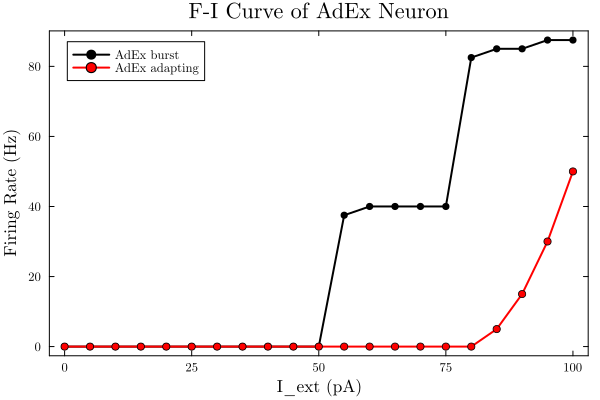

In [17]:

## AdEx model
function adex!(du, u, p, t)
    @unpack C, V_L, I_ext, ΔT, θ, a, b,  R, τm, τw = p
    du[1] = 1/τm * (- (u[1] - V_L) + ΔT *exp((u[1] - θ)/ΔT)) + (-u[2] + I_ext)/C
    du[2] = 1/τw *(a*( u[1]- V_L) - u[2])
end

# Reset condition: when V crosses V_th, reset to V_reset
function reset_condition(u, t, integrator) 
    integrator.u[1] > 0
end
function reset_affect!(integrator)
    integrator.u[1] = integrator.p.V_reset
    integrator.u[2] += integrator.p.b
    push!(integrator.p.spike_times, integrator.t)
end
cb = DiscreteCallback(reset_condition, reset_affect!)

# Initial condition
u0 = [-60.0, 10.]  # Initial membrane potential
tspan = (0.0, 400.0)

# Parameters
p = (C=50, 
    V_L=-60.0, 
    V_reset=-60.0, 
    θ=-50.0, 
    ΔT=2.0, 
    a=-4.0, 
    b=7.0, 
    R=0.5, 
    τm=7, 
    τw=150
)

@update! p begin
    I_ext=95.0
    spike_times = Float64[]
    t_impulse=20.0
    ϵ = 20/140
    A=0.0
end

# u0 = [-60f0, 0f0]
# solution = run_model(p, u0, adex!, (0, 300.0), u_range=-80:-40, w_range=-40:100, reset_cb=cb)

##
fig = Figure(size=(1200, 900))
sl_x = Slider(fig[2,1][2, 1], range = -80:0.01:-40, startvalue = 3)
sl_y = Slider(fig[2,1][1, 2], range = -40:0.01:50, horizontal = false, startvalue = 6)
ax1 = Axis(fig[1, 1], xlabel="Time", ylabel="Value", title="AdEx Neuron Model")
ax2 = Axis(fig[2, 1][1,1], xlabel="u", ylabel="w", title="Phase plane",)
sg = SliderGrid(
    fig[2,1][1, 3],
    (label = "V reset", range = -70:1:-40, format = "{:.1f}mV", startvalue = -55),
    (label = "b", range = 0:1:100, format = "{:.1f} nA", startvalue = 20),
    (label = "a", range = 0:1:20, format = "{:.1f} nS", startvalue = 0),
    width = 350,
    tellheight = false)

sl_vr, sl_b, sl_a = sg.sliders
@lift begin 
    p0 = @update p begin
        V_reset = $(sl_vr.value)
        b = $(sl_b.value)
        a = $(sl_a.value)
        spike_times = Float64[]
    end
    u0  = [$(sl_x.value), $(sl_y.value)]
    solution = run_model(p0, u0, adex!, (0, 300.0), u_range=-80:-40, w_range=-40:100, reset_cb=cb)
    fig = CompNeuro.plot_solution(solution, ax1, ax2)
end
fig

In [ ]:
p = (C=50, 
    V_L=-60.0, 
    V_reset=-60.0, 
    θ=-50.0, 
    ΔT=2.0, 
    a=-4.0, 
    b=7.0, 
    R=0.5, 
    τm=5, 
    τw=150, 
    t_impulse=20.0, 
    I_ext=65.0,
    spike_times = Float64[],
    ϵ = 20/140,
    A=0.0)

anim = @manipulate  for I = 0.0:5:300, b=0:5:60, a=-4:4, Vr= -80:5:-40 # Time of impulse
    ϵ = 0 # Width of impulse
    global p

    ϵ = 0 # Width of impulse
    u0 = [-60f0, 0f0]
    @update! p begin
        b = b
        a = a
        I_ext = I
        V_reset = Vr
    end
    empty!(p.spike_times)

    # p = (I, b0, b1, t_impulse, ε, A)
    run_model(p, u0, adex!, (0, 300.0), u_range=-80:-40, w_range=-10:100, do_quiver=true, reset_cb=cb)
    plot!(plot_title="AdEx Model")
end
